In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
rfm=pd.read_csv(r"C:\Users\Niloy\Downloads\Online_Retail.csv\Online_Retail 1.csv")


In [3]:
rfm

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
# checking null values
rfm.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
# just find the meaning of the negative quantity and there meaning
rfm.groupby('Description')['Quantity'].sum().sort_values(ascending=True).head(135)

Description
printing smudges/thrown away   -19200
Unsaleable, destroyed.         -15644
check                          -12030
Printing smudges/thrown away    -9058
Damaged                         -7540
                                ...  
water damaged                     -15
faulty                            -13
Bank Charges                      -13
damages/showroom etc              -11
found some more on shelf           -9
Name: Quantity, Length: 135, dtype: int64

In [6]:
# all over this data this data contain return quantity and internal manage quanity and unavailable customer id
# and it has return products and it has shipping charges which is not necessary for my analysis of RFM
# for this i drop this data  i dont need

rfm_copy=rfm.copy()   # just make a copy for the analysis


In [7]:
# drop those columns that are not needed in my analysis
rfm_copy=rfm_copy[(rfm_copy['Quantity']>0) & (rfm_copy['CustomerID'].notna()) & (rfm_copy['UnitPrice']>0)]

In [8]:
rfm_copy[rfm_copy['InvoiceNo'].str.startswith('C',na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [9]:
# delete the M code from stock code data
rfm_copy=rfm_copy[rfm_copy['StockCode']!='M']

In [10]:
rfm_copy.describe()  #now every quantity is in postive side

,Quantity,UnitPrice,CustomerID
count,397600.000000,397600.000000,397600.000000
mean,12.979474,2.993506,15294.343016
std,179.356692,14.949702,1713.032951
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [11]:
rfm_copy

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [12]:
# now adding a new column called total amount
rfm_copy['Total_amount']=rfm_copy['Quantity']*rfm_copy['UnitPrice']

In [13]:
rfm_copy

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [14]:
# total number of customers
rfm_copy['CustomerID'].nunique()

4335

In [16]:
rfm_copy['Country'].nunique()

37

In [17]:
# country wise coustoemrs distributions
rfm_copy_distribution=rfm_copy.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).reset_index()

In [18]:
rfm_copy_distribution_top5=rfm_copy_distribution.head(5)

Text(0.5, 0, 'Total number of customers')

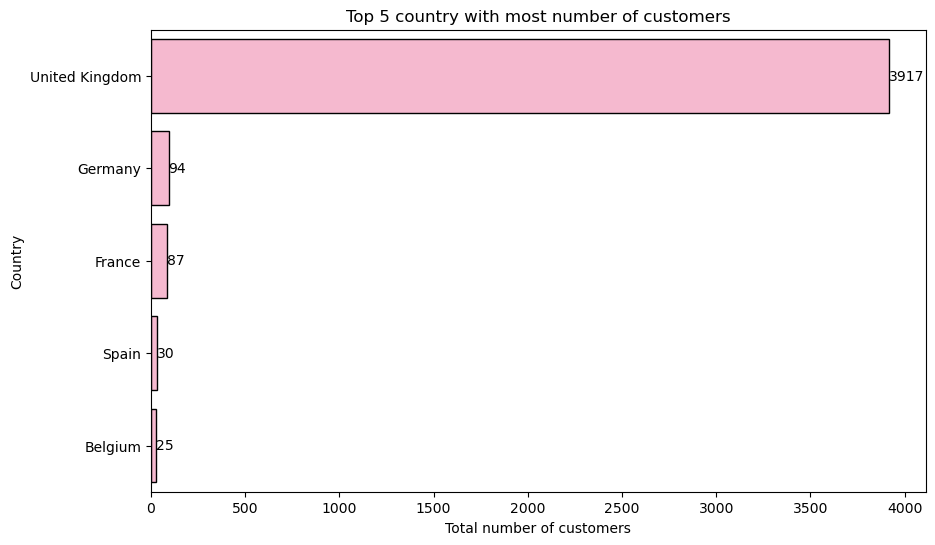

In [19]:
# top 5 country wise number of customer
plt.figure(figsize=(10,6))
ax1=sns.barplot(data=rfm_copy_distribution_top5,x='CustomerID',y='Country',color='#ffafcc',edgecolor='black')
for i in ax1.containers:
    ax1.bar_label(i)
plt.title('Top 5 country with most number of customers')
plt.xlabel('Total number of customers')

In [20]:
#total amount 
rfm_copy_total_amount=rfm_copy.groupby('Country')['Total_amount'].sum().sort_values(ascending=False).reset_index()

In [21]:
rfm_copy_total_amount

,Country,Total_amount
0,United Kingdom,7288192.614
1,Netherlands,285446.340
2,EIRE,262171.560
3,Germany,226570.890
4,France,199531.680
5,Australia,138521.310
6,Spain,61577.110
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38348.330


Text(0.5, 0, 'Total amount')

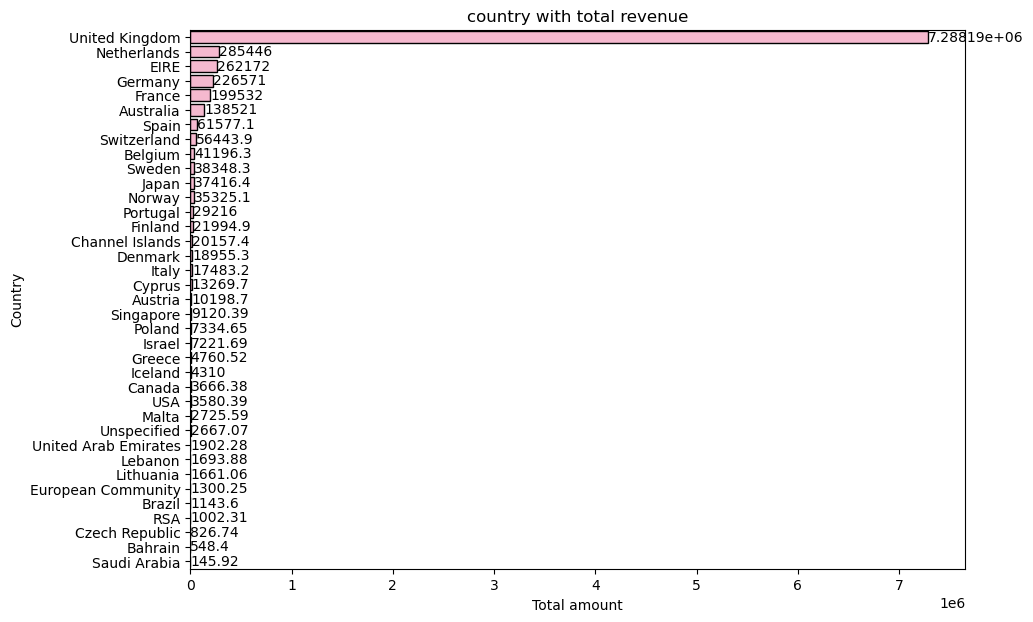

In [22]:
# top 5 country wise total amount
plt.figure(figsize=(10,7))
ax2=sns.barplot(data=rfm_copy_total_amount,x='Total_amount',y='Country',color='#ffafcc',edgecolor='black')
for i in ax2.containers:
    ax2.bar_label(i)
plt.title('country with total revenue')
plt.xlabel('Total amount')

In [23]:
rfm_copy['InvoiceDate']=pd.to_datetime(rfm_copy['InvoiceDate']) #changing the data time 

In [24]:
# month wise sales
rfm_copy['Month;']=rfm_copy['InvoiceDate'].dt.month #accedentally maek this column

In [25]:
rfm_copy['Month']=rfm_copy['InvoiceDate'].dt.month
rfm_copy['Year']=rfm_copy['InvoiceDate'].dt.year
rfm_copy['Year_Month']=rfm_copy['InvoiceDate'].dt.to_period('M')

In [26]:
rfm_copy.drop(columns='Month;',inplace=True) #just drop that unnecessary column

In [27]:
rfm_copy

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_amount,Month,Year,Year_Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,12,2011,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,12,2011,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,2011,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,2011,2011-12


In [28]:
# month wise sales
rfm_copy_month_wise=round(rfm_copy.groupby('Month',as_index=False)['Total_amount'].sum().sort_values(by='Month',ascending=True),2)

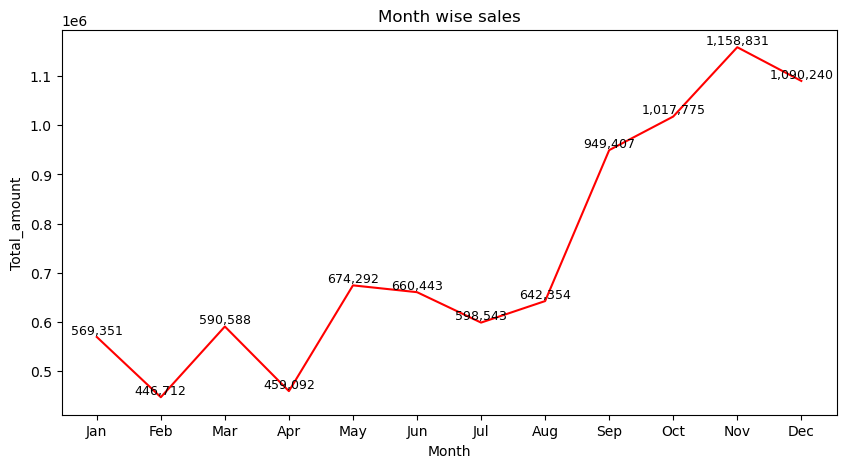

In [29]:

plt.figure(figsize=(10,5))
ax3=sns.lineplot(data=rfm_copy_month_wise,x='Month',y='Total_amount',color='red')
plt.xticks(range(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) #for labels
plt.title('Month wise sales')
for x, y in zip(ax3.lines[0].get_xdata(), ax3.lines[0].get_ydata()):
    ax3.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=9)

In [30]:
# analysis date
analysis_date = rfm_copy['InvoiceDate'].max() + pd.Timedelta(days=1)

In [31]:
rfm_table = rfm_copy.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'Total_amount': 'sum'                                     # Monetary
}).reset_index()


In [32]:
rfm_table.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


In [33]:
# creating r scor e,f score,m score
rfm_table['R_score'] = pd.qcut(
    rfm_table['Recency'],
    5,
    labels=[5,4,3,2,1]
)

rfm_table['F_score'] = pd.qcut(
    rfm_table['Frequency'],
    q=5,
    duplicates='drop',
    labels=False
) + 1

rfm_table['M_score'] = pd.qcut(
    rfm_table['Monetary'],
    q=5,
    duplicates='drop',
    labels=False
) + 1


In [34]:
rfm_table.dtypes

CustomerID     float64
Recency          int64
Frequency        int64
Monetary       float64
R_score       category
F_score          int64
M_score          int64
dtype: object

In [35]:
rfm_table['R_score'] = rfm_table['R_score'].astype(int) #because the R_score become category

In [36]:
# creating rfm score
rfm_table['RFM_score']=(rfm_table['R_score']+rfm_table['F_score']+rfm_table['M_score'])

In [37]:
rfm_table

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
0,12346.0,326,1,77183.60,1,1,5,7
1,12347.0,2,7,4310.00,5,4,5,14
2,12348.0,75,4,1797.24,2,3,4,9
3,12349.0,19,1,1757.55,4,1,4,9
4,12350.0,310,1,334.40,1,1,2,4
...,...,...,...,...,...,...,...,...
4330,18280.0,278,1,180.60,1,1,1,3
4331,18281.0,181,1,80.82,1,1,1,3
4332,18282.0,8,2,178.05,5,1,1,7
4333,18283.0,4,16,2088.93,5,4,5,14


In [38]:
#now just create a status segment table
def rfm_segment(row):
    if row['RFM_score'] >= 13:
        return 'Champions'
    elif row['RFM_score'] >= 10:
        return 'Loyal Customers'
    elif row['RFM_score'] >= 7:
        return 'Potential Loyalist'
    elif row['RFM_score'] >= 5:
        return 'At Risk'
    else:
        return 'Lost Customers'

rfm_table['Segment'] = rfm_table.apply(rfm_segment, axis=1)


In [39]:
rfm_table

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment
0,12346.0,326,1,77183.60,1,1,5,7,Potential Loyalist
1,12347.0,2,7,4310.00,5,4,5,14,Champions
2,12348.0,75,4,1797.24,2,3,4,9,Potential Loyalist
3,12349.0,19,1,1757.55,4,1,4,9,Potential Loyalist
4,12350.0,310,1,334.40,1,1,2,4,Lost Customers
...,...,...,...,...,...,...,...,...,...
4330,18280.0,278,1,180.60,1,1,1,3,Lost Customers
4331,18281.0,181,1,80.82,1,1,1,3,Lost Customers
4332,18282.0,8,2,178.05,5,1,1,7,Potential Loyalist
4333,18283.0,4,16,2088.93,5,4,5,14,Champions


In [40]:
rfm_table_status=rfm_table.groupby('Segment')['CustomerID'].count().sort_values(ascending=False)

Text(0.5, 1.0, 'RFM status wise customers')

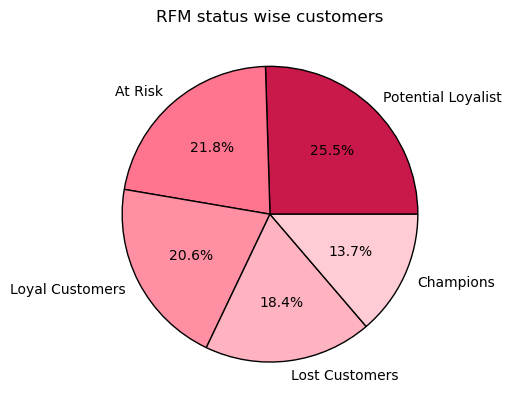

In [41]:
#rfm status wise customer
rfm_table_status.plot(kind='pie',colors=['#c9184a','#ff758f','#ff8fa3','#ffb3c1','#ffccd5','#fff0f3'],autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.ylabel('')
plt.title('RFM status wise customers')


In [42]:
# total amount and segment status
ax5=rfm_table.groupby('Segment')['Monetary'].sum().sort_values(ascending=False)

Text(0.5, 1.0, 'Segment wise revenue')

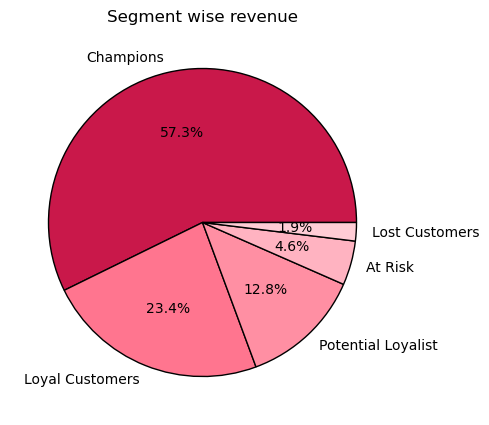

In [43]:
plt.figure(figsize=(5,5))
ax5.plot(kind='pie',colors=['#c9184a','#ff758f','#ff8fa3','#ffb3c1','#ffccd5','#fff0f3'],autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.ylabel('')
plt.title('Segment wise revenue')

In [44]:
# now starting analysis for united kingdom
rfm_copy_UK=rfm_copy[rfm_copy['Country']=='United Kingdom']


In [45]:
# doing the same process
analysis_date_uk=rfm_copy_UK['InvoiceDate'].max()+pd.Timedelta(days=1)

In [46]:

rfm_table_uk=rfm_copy_UK.groupby('CustomerID').agg({'InvoiceDate':lambda x:(analysis_date_uk-x.max()).days,
                                                    'InvoiceNo':'nunique',
                                                    'Total_amount':'sum'}).reset_index()

In [47]:
rfm_table_uk.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [48]:
rfm_table_uk

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12747.0,2,11,4196.01
2,12748.0,1,206,32321.32
3,12749.0,4,5,4090.88
4,12820.0,3,4,942.34
...,...,...,...,...
3912,18280.0,278,1,180.60
3913,18281.0,181,1,80.82
3914,18282.0,8,2,178.05
3915,18283.0,4,16,2088.93


In [49]:
rfm_table_uk['R_score'] = pd.qcut(
    rfm_table_uk['Recency'],
    5,
    labels=[5,4,3,2,1]
)

rfm_table_uk['F_score'] = pd.qcut(
    rfm_table_uk['Frequency'],
    q=5,
    duplicates='drop',
    labels=False
) + 1

rfm_table_uk['M_score'] = pd.qcut(
    rfm_table_uk['Monetary'],
    q=5,
    duplicates='drop',
    labels=False
) + 1

In [50]:
rfm_table_uk

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score
0,12346.0,326,1,77183.60,1,1,5
1,12747.0,2,11,4196.01,5,4,5
2,12748.0,1,206,32321.32,5,4,5
3,12749.0,4,5,4090.88,5,3,5
4,12820.0,3,4,942.34,5,3,4
...,...,...,...,...,...,...,...
3912,18280.0,278,1,180.60,1,1,1
3913,18281.0,181,1,80.82,1,1,1
3914,18282.0,8,2,178.05,5,1,1
3915,18283.0,4,16,2088.93,5,4,5


In [51]:
rfm_table_uk.dtypes

CustomerID     float64
Recency          int64
Frequency        int64
Monetary       float64
R_score       category
F_score          int64
M_score          int64
dtype: object

In [52]:
rfm_table_uk['R_score'] = rfm_table_uk['R_score'].astype(int) #because the R_score become category

In [53]:
rfm_table_uk['RFM_score']=(rfm_table_uk['R_score']+rfm_table_uk['F_score']+rfm_table_uk['M_score'])

In [54]:
rfm_table_uk

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
0,12346.0,326,1,77183.60,1,1,5,7
1,12747.0,2,11,4196.01,5,4,5,14
2,12748.0,1,206,32321.32,5,4,5,14
3,12749.0,4,5,4090.88,5,3,5,13
4,12820.0,3,4,942.34,5,3,4,12
...,...,...,...,...,...,...,...,...
3912,18280.0,278,1,180.60,1,1,1,3
3913,18281.0,181,1,80.82,1,1,1,3
3914,18282.0,8,2,178.05,5,1,1,7
3915,18283.0,4,16,2088.93,5,4,5,14


In [55]:
#now just create a status segment table
def rfm_segment(row):
    if row['RFM_score'] >= 13:
        return 'Champions'
    elif row['RFM_score'] >= 10:
        return 'Loyal Customers'
    elif row['RFM_score'] >= 7:
        return 'Potential Loyalist'
    elif row['RFM_score'] >= 5:
        return 'At Risk'
    else:
        return 'Lost Customers'

rfm_table_uk['Segment'] = rfm_table_uk.apply(rfm_segment, axis=1)

In [56]:
rfm_table_uk

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment
0,12346.0,326,1,77183.60,1,1,5,7,Potential Loyalist
1,12747.0,2,11,4196.01,5,4,5,14,Champions
2,12748.0,1,206,32321.32,5,4,5,14,Champions
3,12749.0,4,5,4090.88,5,3,5,13,Champions
4,12820.0,3,4,942.34,5,3,4,12,Loyal Customers
...,...,...,...,...,...,...,...,...,...
3912,18280.0,278,1,180.60,1,1,1,3,Lost Customers
3913,18281.0,181,1,80.82,1,1,1,3,Lost Customers
3914,18282.0,8,2,178.05,5,1,1,7,Potential Loyalist
3915,18283.0,4,16,2088.93,5,4,5,14,Champions


In [57]:
ax6=rfm_table_uk.groupby('Segment')['CustomerID'].count().sort_values(ascending=False)

Text(0.5, 1.0, 'Segment wise customer in UK')

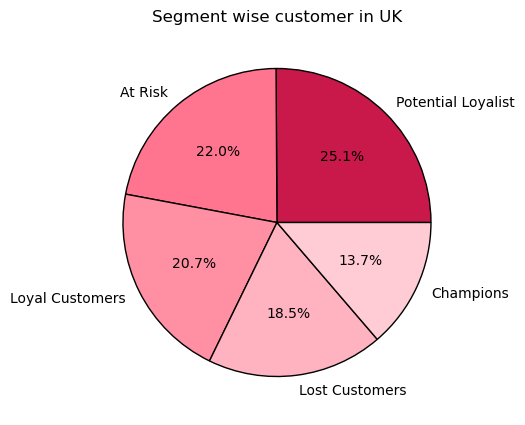

In [58]:
plt.figure(figsize=(5,5))
ax6.plot(kind='pie',colors=['#c9184a','#ff758f','#ff8fa3','#ffb3c1','#ffccd5','#fff0f3'],autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.ylabel('')
plt.title('Segment wise customer in UK')

In [59]:
# total amount and segment status
ax7=rfm_table_uk.groupby('Segment')['Monetary'].sum().sort_values(ascending=False)

Text(0.5, 1.0, 'Segment wise revenue')

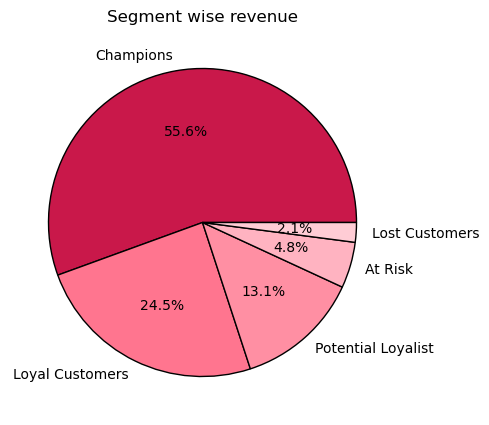

In [60]:
plt.figure(figsize=(5,5))
ax7.plot(kind='pie',colors=['#c9184a','#ff758f','#ff8fa3','#ffb3c1','#ffccd5','#fff0f3'],autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.ylabel('')
plt.title('Segment wise revenue')

In [61]:
rfm_copy_UK

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_amount,Month,Year,Year_Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40,12,2011,2011-12
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60,12,2011,2011-12
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00,12,2011,2011-12
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80,12,2011,2011-12


In [62]:
# month wise total amount in UK
monthwise_total_amount_uk=rfm_copy_UK.groupby('Month')['Total_amount'].sum().reset_index()

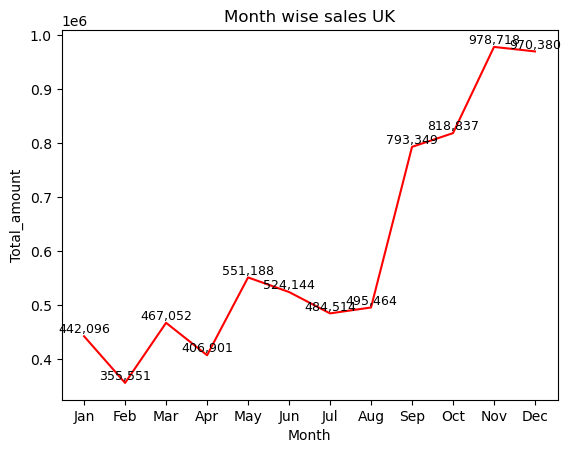

In [89]:
ax8=sns.lineplot(data=monthwise_total_amount_uk,y='Total_amount',x='Month',color='red')
plt.xticks(range(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) #for labels
plt.title('Month wise sales UK')
for x, y in zip(ax8.lines[0].get_xdata(), ax8.lines[0].get_ydata()):
    ax8.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=9)

In [64]:
monthwise_total_amount_uk

,Month,Total_amount
0,1,442095.660
1,2,355550.990
2,3,467051.520
3,4,406900.531
4,5,551188.310
5,6,524144.370
6,7,484514.161
7,8,495463.780
8,9,793349.032
9,10,818836.810


In [65]:
# now want to know which country has higher champions customers
customer_country = (
    rfm_copy[['CustomerID', 'Country']]
    .dropna()
    .drop_duplicates()
)


In [66]:
customer_country

,CustomerID,Country
0,17850.0,United Kingdom
9,13047.0,United Kingdom
26,12583.0,France
46,13748.0,United Kingdom
65,15100.0,United Kingdom
...,...,...
536969,13436.0,United Kingdom
537255,15520.0,United Kingdom
538064,13298.0,United Kingdom
538812,14569.0,United Kingdom


In [67]:
rfm_table

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment
0,12346.0,326,1,77183.60,1,1,5,7,Potential Loyalist
1,12347.0,2,7,4310.00,5,4,5,14,Champions
2,12348.0,75,4,1797.24,2,3,4,9,Potential Loyalist
3,12349.0,19,1,1757.55,4,1,4,9,Potential Loyalist
4,12350.0,310,1,334.40,1,1,2,4,Lost Customers
...,...,...,...,...,...,...,...,...,...
4330,18280.0,278,1,180.60,1,1,1,3,Lost Customers
4331,18281.0,181,1,80.82,1,1,1,3,Lost Customers
4332,18282.0,8,2,178.05,5,1,1,7,Potential Loyalist
4333,18283.0,4,16,2088.93,5,4,5,14,Champions


In [68]:
# now want to join two tables customer_country and rfm_table
rfm_table_status_Country=rfm_table.merge(customer_country,on='CustomerID',how='left')

In [69]:
rfm_table_status_Country

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment,Country
0,12346.0,326,1,77183.60,1,1,5,7,Potential Loyalist,United Kingdom
1,12347.0,2,7,4310.00,5,4,5,14,Champions,Iceland
2,12348.0,75,4,1797.24,2,3,4,9,Potential Loyalist,Finland
3,12349.0,19,1,1757.55,4,1,4,9,Potential Loyalist,Italy
4,12350.0,310,1,334.40,1,1,2,4,Lost Customers,Norway
...,...,...,...,...,...,...,...,...,...,...
4338,18280.0,278,1,180.60,1,1,1,3,Lost Customers,United Kingdom
4339,18281.0,181,1,80.82,1,1,1,3,Lost Customers,United Kingdom
4340,18282.0,8,2,178.05,5,1,1,7,Potential Loyalist,United Kingdom
4341,18283.0,4,16,2088.93,5,4,5,14,Champions,United Kingdom


In [70]:
lc=rfm_table_status_Country[rfm_table_status_Country['Segment']=='Lost Customers'].groupby('Country')['CustomerID'].count().sort_values(ascending=False).reset_index()

In [71]:
c=rfm_table_status_Country[rfm_table_status_Country['Segment']=='Champions'].groupby('Country')['CustomerID'].count().sort_values(ascending=False).reset_index()

In [72]:
r=rfm_table_status_Country[rfm_table_status_Country['Segment']=='At Risk'].groupby('Country')['CustomerID'].count().sort_values(ascending=False).reset_index()

In [73]:
lc.head(5)

,Country,CustomerID
0,United Kingdom,740
1,France,14
2,Germany,7
3,Spain,4
4,Belgium,4


In [74]:
c.head(5)

,Country,CustomerID
0,United Kingdom,531
1,Germany,22
2,France,18
3,Belgium,5
4,Portugal,3


In [75]:
rfm_table_status_Country


,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment,Country
0,12346.0,326,1,77183.60,1,1,5,7,Potential Loyalist,United Kingdom
1,12347.0,2,7,4310.00,5,4,5,14,Champions,Iceland
2,12348.0,75,4,1797.24,2,3,4,9,Potential Loyalist,Finland
3,12349.0,19,1,1757.55,4,1,4,9,Potential Loyalist,Italy
4,12350.0,310,1,334.40,1,1,2,4,Lost Customers,Norway
...,...,...,...,...,...,...,...,...,...,...
4338,18280.0,278,1,180.60,1,1,1,3,Lost Customers,United Kingdom
4339,18281.0,181,1,80.82,1,1,1,3,Lost Customers,United Kingdom
4340,18282.0,8,2,178.05,5,1,1,7,Potential Loyalist,United Kingdom
4341,18283.0,4,16,2088.93,5,4,5,14,Champions,United Kingdom


In [76]:
# custoemrs with higher purchasing amount but lower frequency
high_M_low_F = rfm_table_status_Country[
    (rfm_table_status_Country['F_score'] <= 2) &
    (rfm_table_status_Country['M_score'] >= 4)
]

In [77]:
high_M_low_F=high_M_low_F['Country'].value_counts().reset_index().head(5) #showing top 5 of this country

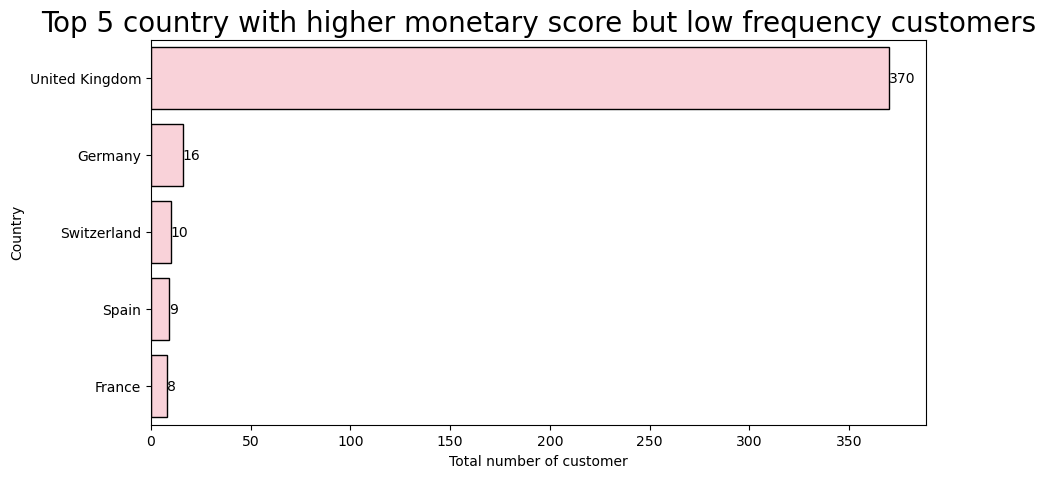

In [78]:
plt.figure(figsize=(10,5))
ax12=sns.barplot(data=high_M_low_F,x='count',y='Country',color='#ffccd5',edgecolor='black')
plt.xlabel('Total number of customer')
plt.title('Top 5 country with higher monetary score but low frequency customers',fontsize=20)
for i in ax12.containers:
    ax12.bar_label(i)

In [79]:
# custoemrs with lower purchasing amount but higher frequency
high_F_low_M = rfm_table_status_Country[
    (rfm_table_status_Country['F_score'] <= 4) &
    (rfm_table_status_Country['M_score'] >= 2)
]

In [80]:
h_f_l_m=high_F_low_M['Country'].value_counts().reset_index().head(5) #showing top 5 of this country

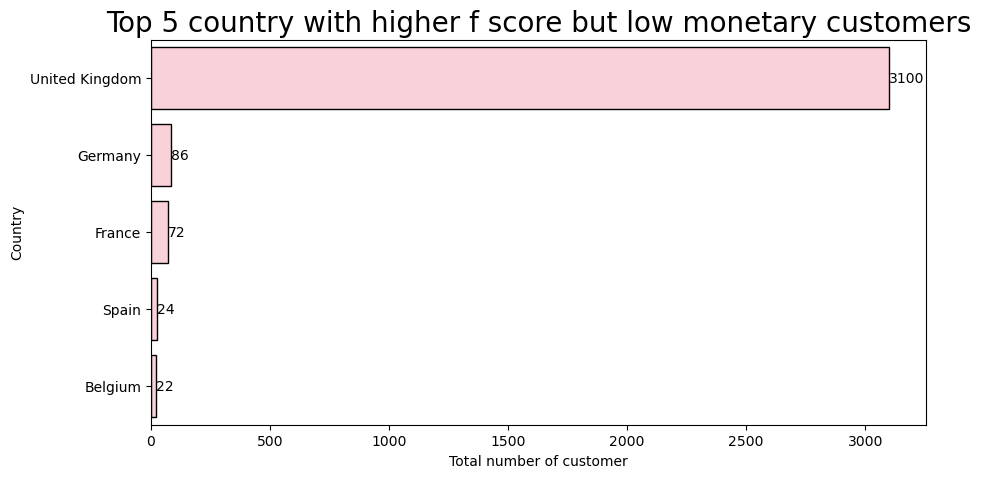

In [81]:
plt.figure(figsize=(10,5))
ax11=sns.barplot(data=h_f_l_m,x='count',y='Country',color='#ffccd5',edgecolor='black')
plt.xlabel('Total number of customer')
plt.title('Top 5 country with higher f score but low monetary customers',fontsize=20)
for i in ax11.containers:
    ax11.bar_label(i)

In [82]:
# average frequency and avg spending segment wise
mon_vs_fre=round(rfm_table.groupby('Segment')[['Frequency','Monetary']].mean().sort_values('Frequency', ascending=False),0)


Text(0.5, 1.0, 'Monetary vs Frequency')

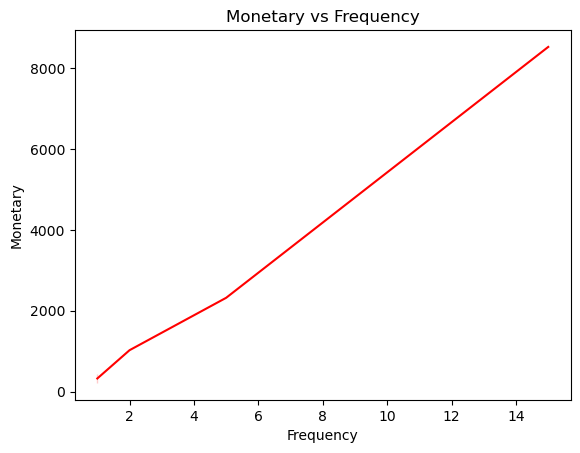

In [83]:
ax9=sns.lineplot(data=mon_vs_fre,x='Frequency',y='Monetary',color='red')
plt.title('Monetary vs Frequency')

In [84]:
high_r_score=rfm_table_status_Country[(rfm_table_status_Country['R_score']>=4) & (rfm_table_status_Country['F_score']>=2)&(rfm_table_status_Country['M_score']>=2)]

In [85]:
h_5_r=high_r_score['Country'].value_counts().reset_index().head(5)

In [86]:
h_5_r

,Country,count
0,United Kingdom,1118
1,Germany,34
2,France,34
3,Belgium,9
4,Spain,9


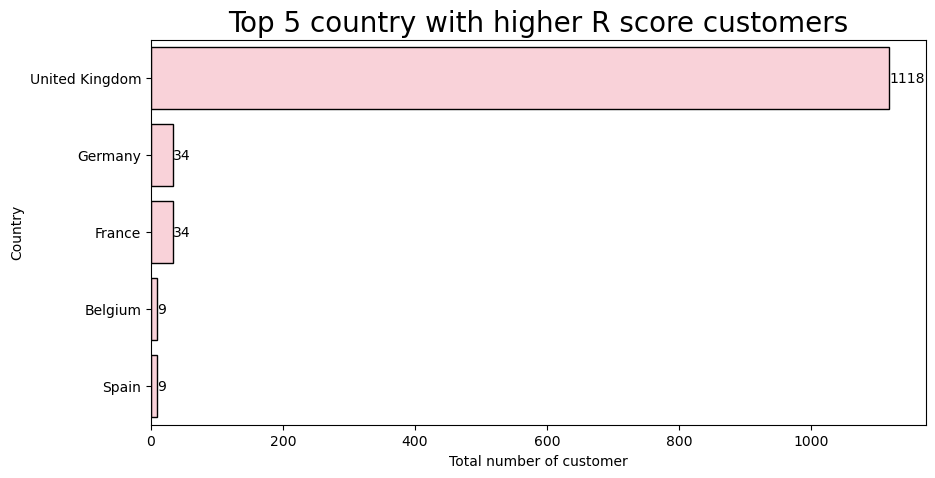

In [87]:
plt.figure(figsize=(10,5))
ax10=sns.barplot(data=h_5_r,x='count',y='Country',color='#ffccd5',edgecolor='black')
plt.xlabel('Total number of customer')
plt.title('Top 5 country with higher R score customers',fontsize=20)
for i in ax10.containers:
    ax10.bar_label(i)


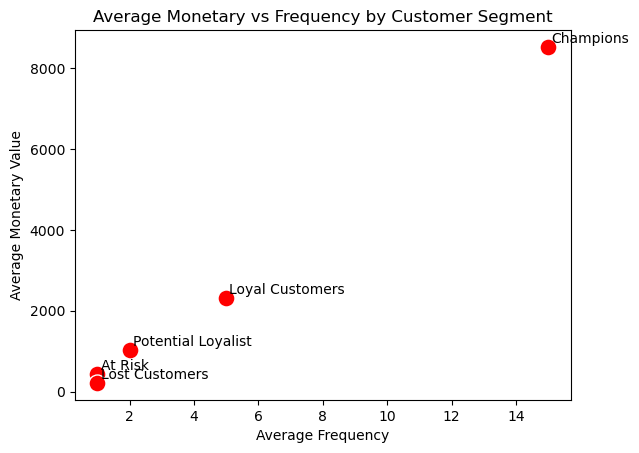

In [88]:
# frequency wise and average monetary value wise custoemrs
ax13=sns.scatterplot(
    data=mon_vs_fre,
    x='Frequency',
    y='Monetary',
    s=150,
    color='red'
)
plt.title('Average Monetary vs Frequency by Customer Segment')
plt.xlabel('Average Frequency')
plt.ylabel('Average Monetary Value')
for segment, row in mon_vs_fre.iterrows():
    ax13.text(
        row['Frequency'] + 0.1,
        row['Monetary'] + 100,
        segment,
        fontsize=10
    )
